<a href="https://colab.research.google.com/github/HoYoungChun/financial_data_analysis/blob/main/%EC%B6%94%EC%84%B8%ED%88%AC%EC%9E%90%EB%B2%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import libraries

In [1]:
import pandas as pd
import requests
import numpy as np
from tqdm import tqdm

### Get KOSPI 200 market data(Daily)

In [21]:
kodex_200 = pd.DataFrame()

kodex_url = 'https://finance.naver.com/item/sise_day.nhn?code=069500'

for page in tqdm(range(1,100)):
    pg_url = '{url}&page={page}'.format(url=kodex_url, page=page)
    pg_url = requests.get(pg_url, headers={'User-agent':'Mozilla/5.0'}).text
    kodex_200 = kodex_200.append(pd.read_html(pg_url)[0], ignore_index=True)
    #pd.read_html(pg_url)[0]
kodex_200

100%|██████████| 99/99 [00:22<00:00,  4.37it/s]


,날짜,종가,전일비,시가,고가,저가,거래량
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021.07.15,43460.0,60.0,43525.0,43555.0,43380.0,355655.0
2,2021.07.14,43400.0,150.0,43400.0,43465.0,43225.0,3453656.0
3,2021.07.13,43550.0,365.0,43380.0,43565.0,43380.0,3654600.0
4,2021.07.12,43185.0,385.0,43060.0,43260.0,43060.0,3929269.0
...,...,...,...,...,...,...,...
1480,2017.07.11,31480.0,175.0,31345.0,31500.0,31300.0,4983074.0
1481,2017.07.10,31305.0,105.0,31300.0,31390.0,31220.0,4338365.0
1482,2017.07.07,31200.0,125.0,31200.0,31285.0,31115.0,5436532.0
1483,2017.07.06,31325.0,5.0,31395.0,31395.0,31240.0,6394300.0


In [22]:
kodex_200 = kodex_200.dropna()
kodex_200.columns = ['date','close','over_the_day','open','high','low','volume']
kodex_200.date = pd.to_datetime(kodex_200.date)

print('출처: ', kodex_url)
print(kodex_200.shape)
kodex_200.head()

출처:  https://finance.naver.com/item/sise_day.nhn?code=069500
(990, 7)


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,date,close,over_the_day,open,high,low,volume
1,2021-07-15,43460.0,60.0,43525.0,43555.0,43380.0,355655.0
2,2021-07-14,43400.0,150.0,43400.0,43465.0,43225.0,3453656.0
3,2021-07-13,43550.0,365.0,43380.0,43565.0,43380.0,3654600.0
4,2021-07-12,43185.0,385.0,43060.0,43260.0,43060.0,3929269.0
5,2021-07-09,42800.0,460.0,42840.0,43050.0,42445.0,8288519.0


In [25]:
kodex_200 = kodex_200.sort_values(by='date')
kodex_200

,date,close,over_the_day,open,high,low,volume
1483,2017-07-06,31325.0,5.0,31395.0,31395.0,31240.0,6394300.0
1482,2017-07-07,31200.0,125.0,31200.0,31285.0,31115.0,5436532.0
1481,2017-07-10,31305.0,105.0,31300.0,31390.0,31220.0,4338365.0
1480,2017-07-11,31480.0,175.0,31345.0,31500.0,31300.0,4983074.0
1479,2017-07-12,31475.0,5.0,31480.0,31555.0,31450.0,9780095.0
...,...,...,...,...,...,...,...
5,2021-07-09,42800.0,460.0,42840.0,43050.0,42445.0,8288519.0
4,2021-07-12,43185.0,385.0,43060.0,43260.0,43060.0,3929269.0
3,2021-07-13,43550.0,365.0,43380.0,43565.0,43380.0,3654600.0
2,2021-07-14,43400.0,150.0,43400.0,43465.0,43225.0,3453656.0


In [26]:
movg_90 = kodex_200.close.rolling(window=90).mean()
movg_90.head(90)

1483        NaN
1482        NaN
1481        NaN
1480        NaN
1479        NaN
         ...   
1355        NaN
1354        NaN
1353        NaN
1352        NaN
1351    31944.0
Name: close, Length: 90, dtype: float64

In [27]:
kodex_200['MAVG_90'] = movg_90
kodex_200 = kodex_200.dropna()
kodex_200

,date,close,over_the_day,open,high,low,volume,MAVG_90
1351,2017-11-17,33425.0,10.0,33605.0,33835.0,33425.0,16551618.0,31944.000000
1348,2017-11-20,33280.0,145.0,33485.0,33545.0,33245.0,16318516.0,31965.722222
1347,2017-11-21,33355.0,75.0,33410.0,33505.0,33300.0,9555691.0,31989.666667
1346,2017-11-22,33560.0,205.0,33600.0,33735.0,33485.0,13442803.0,32014.722222
1345,2017-11-23,33500.0,60.0,33610.0,33615.0,33445.0,7849119.0,32037.166667
...,...,...,...,...,...,...,...,...
5,2021-07-09,42800.0,460.0,42840.0,43050.0,42445.0,8288519.0,42835.555556
4,2021-07-12,43185.0,385.0,43060.0,43260.0,43060.0,3929269.0,42847.666667
3,2021-07-13,43550.0,365.0,43380.0,43565.0,43380.0,3654600.0,42866.333333
2,2021-07-14,43400.0,150.0,43400.0,43465.0,43225.0,3453656.0,42887.722222


## Visulization

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt

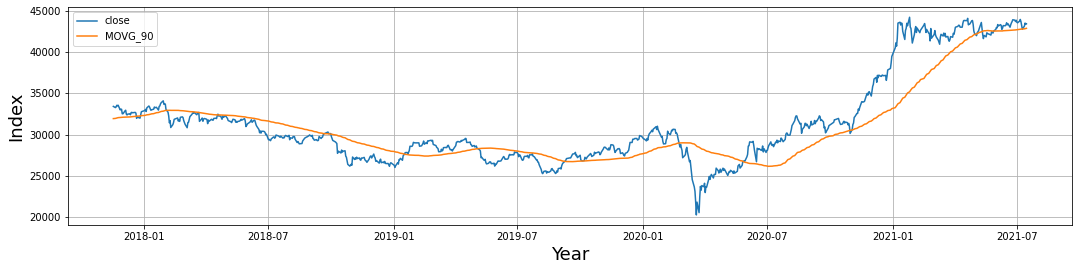

In [29]:
plt.figure(figsize=(18,4))

plt.plot(kodex_200.date, kodex_200.close, label='close')
plt.plot(kodex_200.date, kodex_200.MAVG_90, label='MOVG_90')

plt.legend(loc='best')
plt.xlabel('Year', fontsize=18)
plt.ylabel('Index', fontsize=18)
plt.grid()

plt.show()

## Backtesting

In [30]:
def backtest(beginning_asset=100000):
    asset=[beginning_asset]

    for i in range(len(kodex_200) - 1):
        #이전 시점 코스피 이평선 대비 현 시점 코스피 이평선이 상승했을 경우,
        if kodex_200.iloc[i-1].MAVG_90 < kodex_200.iloc[i].MAVG_90:
            kodex_shares = beginning_asset / kodex_200.iloc[i].close
            kodex_ending_value = kodex_shares * kodex_200.iloc[i+1].close

            asset.append(kodex_ending_value)
            beginning_asset = kodex_ending_value

        #이전 시점 코스피 이평선 대비 현 시점 코스피 이평선이 하락했을 경우,
        elif kodex_200.iloc[i-1].MAVG_90 > kodex_200.iloc[i].MAVG_90:
            kodex_shares = 0
            kodex_ending_value = beginning_asset

            asset.append(kodex_ending_value)
            beginning_asset = kodex_ending_value

    return asset

In [31]:
result = backtest()

In [32]:
back_test = {
    'date':kodex_200.date,
    'backtest':result,
    'kospi':kodex_200.close/kodex_200.iloc[0].close * 100000
}

In [33]:
back_test = pd.DataFrame(back_test)
back_test

,date,backtest,kospi
1351,2017-11-17,100000.000000,100000.000000
1348,2017-11-20,100000.000000,99566.192969
1347,2017-11-21,100225.360577,99790.575916
1346,2017-11-22,100841.346154,100403.889304
1345,2017-11-23,100661.057692,100224.382947
...,...,...,...
5,2021-07-09,116420.047303,128047.868362
4,2021-07-12,117467.283710,129199.700823
3,2021-07-13,118460.118225,130291.697831
2,2021-07-14,118052.104041,129842.931937


In [34]:
kodex_200 = kodex_200.sort_values(by='date')
kodex_200

,date,close,over_the_day,open,high,low,volume,MAVG_90
1351,2017-11-17,33425.0,10.0,33605.0,33835.0,33425.0,16551618.0,31944.000000
1348,2017-11-20,33280.0,145.0,33485.0,33545.0,33245.0,16318516.0,31965.722222
1347,2017-11-21,33355.0,75.0,33410.0,33505.0,33300.0,9555691.0,31989.666667
1346,2017-11-22,33560.0,205.0,33600.0,33735.0,33485.0,13442803.0,32014.722222
1345,2017-11-23,33500.0,60.0,33610.0,33615.0,33445.0,7849119.0,32037.166667
...,...,...,...,...,...,...,...,...
5,2021-07-09,42800.0,460.0,42840.0,43050.0,42445.0,8288519.0,42835.555556
4,2021-07-12,43185.0,385.0,43060.0,43260.0,43060.0,3929269.0,42847.666667
3,2021-07-13,43550.0,365.0,43380.0,43565.0,43380.0,3654600.0,42866.333333
2,2021-07-14,43400.0,150.0,43400.0,43465.0,43225.0,3453656.0,42887.722222


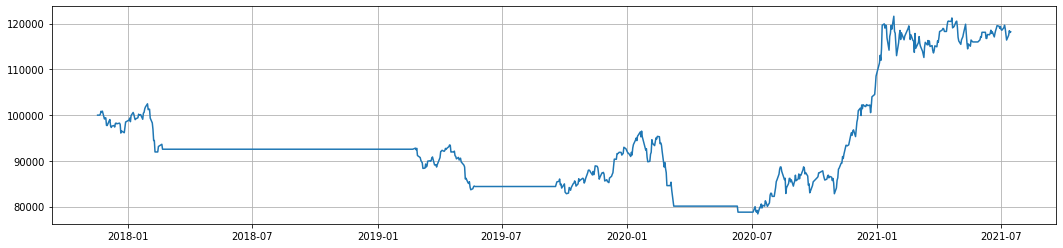

In [35]:
plt.figure(figsize=(18,4))
plt.plot(kodex_200.date,result)
plt.grid()
plt.show()

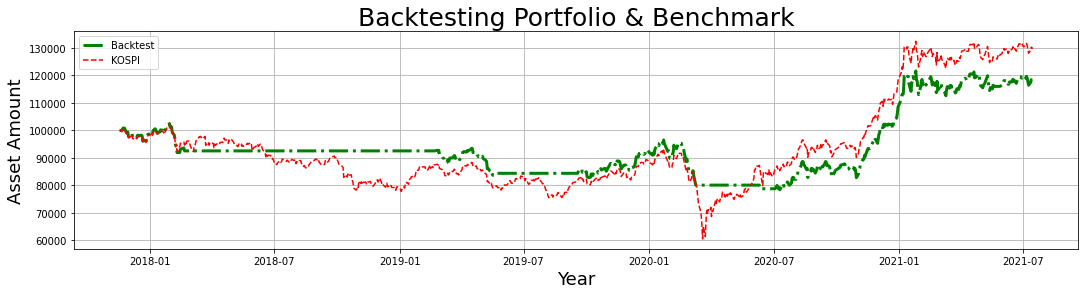

In [40]:
plt.figure(figsize=(18,4))
plt.plot(back_test.date,
         back_test.backtest,
         label='Backtest',
         color='green',
         linestyle='dashdot',
         linewidth=3
         )
plt.plot(back_test.date, back_test.kospi, label='KOSPI', color='red', linestyle='dashed')

plt.title('Backtesting Portfolio & Benchmark', fontsize=25)
plt.xlabel('Year',fontsize=18)
plt.ylabel('Asset Amount',fontsize=18)
plt.grid()
plt.legend(loc='best')
plt.show()

## compute CAGR

In [41]:
start, end = kodex_200.iloc[0].close, kodex_200.iloc[-1].close
cagr = ((end/start)**(1/len(set(kodex_200.date.dt.year))) - 1) * 100
print("%.2f" % cagr, "%")

5.39 %


In [44]:
start, end = result[0], result[-1]
cagr = ((end/start)**(1/len(set(kodex_200.date.dt.year))) - 1) * 100
print("%.2f" % cagr, "%")

3.40 %
